# MSc. Project

## Title: Creating a Sustainable Product Database

### Type: Exploratory Software

#### By: Anushree Sarvey Sathish (sc22a2ss@leeds.ac.uk)

### Problem Statement
- Growing global concern about the impact of products on the planet.
- Consumers want to make informed choices about the products they purchase and are seeking green/sustainable products.
- **Lack of reliable and readily available sustainable product data** along with its sustainability credentials.

### Benefits of Sustainable Product Database:
- Consumers can make informed decisions about the products they purchase.
- Businesses can develop and market sustainable products.
- Governments can track the progress of sustainable initiatives.
- Researchers can study the impact of sustainable products on the environment.
- Educators can teach students about sustainable products.


### Project Aim
Create **Sustainable Product Database** which contains _product data_ like title, description, price, brand, etc and _sustainability information_ on various categories like environment, health, quality and social.

### Objectives
- Identify product data with descriptions that can help in identifying the sustainability information of the product.
- Identify source of sustainability information. 
- Identify suitable techniques to map each product with their sustainability labels. 
- Build a pipeline to use the product data, sustainability information and map the two to create the Sustainable products dataset. 
- Demonstrate the usage of the database through case studies.

### Solution

- [X] Identify product data with descriptions - **Amazon Product Data**
- [X] Identify source of sustainability information - **ASSET Ontology Data**
- [X] Keyword Extraction - Identify relavant tags from product descriptions - TF-IDF
- [X] Mapping Keywords - Map idenitified keywords with sustainability factors - Ontology-based computation
- [X] Evaluation - Case Studies (Comparitive Analysis, Evaluation of Classification Model)


## Deliverables
 - Sustainable Product Database (Sqlite3)
 - Data Pipeline Modules
 - Two Sample Data Pipelines (for 2 different data sources)

### Project Pipeline
<center><img src="ProjectDataPipeline_New.drawio.png" width="100%"/></center>


### Sustainable Product Database Schema

<center><img src="DBSchemaFinal.svg" width="50%"/></center>

### Ontology Data
#### Product Tags
Product tags are keywords extracted from product's descriptions

Example:<br>
__Product Title__ - *uncle bens whole grain brown rice bag lb* <br>
__Product Description__ - *discover a delicious way to support a healthy heart and a wellbalanced diet this flavorful  whole grain brown rice is __low in fat__ high in flavor and a natural source of fiber use our whole grain brown rice in your favorite rice dishes from rice pilaf and jambalaya to stirfry rice recipesand everything inbetween uncle bens whole grain brown rice is __gluten free__ sodium free and __cholesterol free__ and contains zero grams of trans fat and no saturated fat so it is a choice you can feel good about when you start your meal with uncle bens rice its easy to cook a tasty wholesome meal that everyone will enjoy diets __low in saturated fats__ and cholesterol may reduce the risk of heart disease whole grain brown parboiled rice*

__Product Tags__ - *low fat*, *gluten free*, *cholesterol free*, *low saturated fats*


### Sustainbility Preferences
These are sustaibility goals under different dimensions - environment, health, quality, social

Example:

- *Products without preservatives* - Health category
- *Products disposed in an environmentally friendly way (e.g. bio-degradable or recyclable packaging)* - Environment category
- *Fresh products* - Quality category
- *Products from companies that support animal rights protection* - Social category


### Associations

Relation between product and preference tags. This relation can be positive or negative.

Example:

- Preference tag "*vegan*" - __positive association__ -> product tag "*plant based product*"

- Preference tag "*vegan*" - __negative association__ -> product tag "*contains egg*"

### Amazon Data

Dataset Link - https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/ 

|Dataset Feature|Value|
|---|---|
|Products Category|Grocery_and_Gourmet_Food|
|Number of columns|18|
|Number of records|287,051| 

### Import Required Modules

In [1]:
import pandas as pd
import numpy as np
import json
import re
import html
import import_ipynb
import pickle

## Amazon Data

### Reading Amazon Data

In [2]:
AMAZON_DATA_FILE_PATH = "meta_Grocery_and_Gourmet_Food.json"
data = []
with open(AMAZON_DATA_FILE_PATH) as f:
    for line in f:
        data.append(json.loads(line.strip()))
amazon_data = pd.DataFrame.from_dict(data)
print(f"Number of columns: {amazon_data.shape[1]} | Number of records= {amazon_data.shape[0]}")
print(f"Columns in amazon dataset: {list(amazon_data.columns)}")

Number of columns: 19 | Number of records= 287051
Columns in amazon dataset: ['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details']


### Data Overview

In [3]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         287051 non-null  object
 1   tech1            287051 non-null  object
 2   description      287051 non-null  object
 3   fit              287051 non-null  object
 4   title            287051 non-null  object
 5   also_buy         287051 non-null  object
 6   tech2            287051 non-null  object
 7   brand            287051 non-null  object
 8   feature          287051 non-null  object
 9   rank             287051 non-null  object
 10  also_view        287051 non-null  object
 11  main_cat         287051 non-null  object
 12  similar_item     287051 non-null  object
 13  date             287051 non-null  object
 14  price            287051 non-null  object
 15  asin             287051 non-null  object
 16  imageURL         287051 non-null  object
 17  imageURLHi

In [4]:
amazon_data.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,[],[],NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


### Pre-Processing (Amazon Data)

In [5]:
from ProjectModules import ColumnDropper, RowDropper, StringCleaner
from sklearn.pipeline import Pipeline

importing Jupyter notebook from ProjectModules.ipynb


**Filter the data** to include only **Food Category**.

In [6]:
amazon_data = amazon_data.loc[amazon_data["main_cat"]=="Grocery"].reset_index(drop=True)
amazon_data["description"] = amazon_data["description"].apply(
    lambda desc: ' '.join(desc) if type(desc)==list else desc)
amazon_data["description_before"] = amazon_data["description"].apply(
    lambda desc: ' '.join(desc) if type(desc)==list else desc) # Taking backup of originial descriptions

**Defining Pre-Processing Pipeline**

In [7]:
amazon_data_preprocess_pipeline = Pipeline([
    ("drop_columns", ColumnDropper(columns=['category', 'description', 'description_before', 
                                            'title', 'brand', 'price', 'asin'], 
                                   should_drop=False)),
    ("drop_rows", RowDropper(columns=["title", "description"])),
    ("clean_string", StringCleaner(columns=["description"])),
    ("final_drop_rows", RowDropper(columns=["description"]))
])
amazon_data = amazon_data_preprocess_pipeline.fit_transform(amazon_data)
print(f"Number of columns: {amazon_data.shape[1]} | Number of records= {amazon_data.shape[0]}")
print(f"Columns in amazon dataset: {list(amazon_data.columns)}")
amazon_data.head(2)

Number of columns: 7 | Number of records= 202961
Columns in amazon dataset: ['category', 'description', 'title', 'brand', 'price', 'asin', 'description_before']


,category,description,title,brand,price,asin,description_before
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",beemster gouda cheese aged months statements r...,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,Ariola Imports,$41.91,0681727810,BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS Statem...
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",shipped from uk please allow to business days ...,Trim Healthy Mama Xylitol,,,0853347867,"Shipped from UK, please allow 10 to 21 busines..."


In [8]:
# As this category is mostly required for data visualisation later, this field will not be cleaned any further
amazon_data["category"].value_counts().head(5)

[Grocery & Gourmet Food, Candy & Chocolate, Candy & Chocolate Bars]                               5651
[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea, Tea Samplers]                       5124
[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Coffee, Single-Serve Capsules & Pods]    4571
[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Coffee, Ground Coffee]                   3603
[Grocery & Gourmet Food, Candy & Chocolate, Hard Candy & Lollipops, Hard Candy]                   3348
Name: category, dtype: int64

#### Database Writer

In [9]:
from ProjectModules import DatabaseWriter

In [10]:
dbWriter = DatabaseWriter("sustainable_product_db_final.db")
dbWriter.create_tables()

Successfully created tables


In [11]:
table_col_map = {"asin":"product_code", "title": "product_title", "description_before":"product_description", "category":"product_category"}
data_to_insert = amazon_data[['asin', 'title', 'description_before', 'category', 'brand', 'price']]
data_to_insert["source"] = "amazon_data_1"
data_to_insert["category"] = data_to_insert["category"].astype(str)
data_to_insert = data_to_insert.rename(columns=table_col_map)
dbWriter.insert_data(df=data_to_insert, table_name="product_data", include_index=True)

Successfully inserted (or updated) product_data table


## Ontology Data

### Reading Ontology Data

In [12]:
ONTOLOGY_DATA_PATH = "I:\MSc\Product Dataset\\"
product_tags = pd.read_csv(ONTOLOGY_DATA_PATH + "product_tags.csv")
preferences = pd.read_csv(ONTOLOGY_DATA_PATH + "preferences.csv")
field_test_preferences = pd.read_csv(ONTOLOGY_DATA_PATH + "field_test_preferences.csv")
preference_tags = pd.read_csv(ONTOLOGY_DATA_PATH + "preference_tags.csv")
preference_to_tags = pd.read_csv(ONTOLOGY_DATA_PATH + "preference_to_tags.csv")
associations = pd.read_csv(ONTOLOGY_DATA_PATH + "associations.csv")

In [13]:
# Filtering data present in the latest version (i.e, not removed from any version)
product_tags = product_tags[product_tags["version removed"]==-1]
preferences = preferences[preferences["version removed"]==-1]
preference_tags = preference_tags[preference_tags["version removed"]==-1]
preference_to_tags = preference_to_tags[preference_to_tags["version removed"]==-1]
associations = associations[associations["version removed"]==-1]

# Dropping 'version removed' column
product_tags.drop("version removed", axis=1, inplace=True)
preferences.drop("version removed", axis=1, inplace=True)
preference_tags.drop("version removed", axis=1, inplace=True)
preference_to_tags.drop("version removed", axis=1, inplace=True)
associations.drop("version removed", axis=1, inplace=True)

field_test_preferences = field_test_preferences.iloc[:,:-3] 

### Integrate Ontology Data

In [14]:
integrated_data = associations.merge(preference_tags, 
                   on="preference tag id", 
                   how="inner").merge(product_tags, 
                                      on="product tag id", 
                                      how="inner").merge(preference_to_tags, 
                                                         on="preference tag id", 
                                                         how="inner")
integrated_data = field_test_preferences.merge(integrated_data, on="preference id", how="left")

In [15]:
integrated_data[[ "product tag", "preference tag", "score",  "preference", "preference category"]].sample(5)

,product tag,preference tag,score,preference,preference category
754,organization/label tag 14,Business Practice and Ethical Issues,0.090909,4. Products from companies that support fairne...,S. Social
471,has no packaging,fresh,0.200000,2. Fresh products,Q. Quality
278,organization/label tag 32,farming regulations,0.550000,3. Sustainably farmed products,E. Environment
159,Aluminiumdose,waste recycling,0.650000,1. Products disposed in an environmentally fri...,E. Environment
97,egg organic,biodynamic and permaculture,0.300000,1. Products disposed in an environmentally fri...,E. Environment


In [16]:
# Removing organization and packaging type labels
ontology_data = integrated_data.loc[~((integrated_data['product tag'].str.contains("organization")) 
                                      | (integrated_data['product tag'].str.contains("packaging")))].reset_index(drop=True)
ontology_data[[ "product tag", "preference tag", "score",  "preference", "preference category", "is strict"]].sample(5)

,product tag,preference tag,score,preference,preference category,is strict
119,allergens eggs and products thereof,allergen free,-1.0,1. Allergen-free products,H. Health,False
33,company has an environmental report,green farming,0.1,1. Products disposed in an environmentally fri...,E. Environment,False
162,allergens eggs and products thereof,high protein,0.1,3. High-protein products,H. Health,False
85,CO2-Neutraler Produktionsprozess,CO-Labelling Environment,0.5,2. Products produced and distributed in an env...,E. Environment,False
272,contains milk,vegan,-1.0,3. Products from companies that support animal...,S. Social,False


In [17]:
ontology_data = ontology_data[[ "product tag", "preference tag", "score",  "preference", "preference category", "is strict"]]
ontology_data.shape

(321, 6)

In [18]:
# To uniformly clean string for amazon as well as ontology data
sc = StringCleaner(["product tag", "preference tag"])
ontology_data = sc.transform(ontology_data)

## Vocab Creation

### Automatic Data Augmentation

Combing preference and product tags to create vocabulary

In [19]:
ontology_data["preference"] = ontology_data["preference"].apply(lambda s: ' '.join(s.split()[1:]))
ontology_data["preference category"] = ontology_data["preference category"].apply(lambda s: ' '.join(s.split()[1:]))
ontology_data[[ "product tag", "preference tag", "score",  "preference", "preference category", "is strict"]].sample(5)

,product tag,preference tag,score,preference,preference category,is strict
134,austrian allergens fish and derived products,allergen free,-1.0,Allergen-free products,Health,False
34,no public environmental reports,green farming,-0.5,Products disposed in an environmentally friend...,Environment,False
92,egg enriched cages,farming regulations,-0.3,Sustainably farmed products,Environment,False
124,allergens sesame seeds and products thereof,allergen free,-1.0,Allergen-free products,Health,False
52,product usually packaged in plastic,waste recycling,-0.2,Products disposed in an environmentally friend...,Environment,False


In [20]:
# Transforming scores to integer
ontology_data["score"] = ontology_data["score"].apply(lambda x: 1 if x>=0 else -1)


In [21]:
ontology_data[[ "product tag", "preference tag", "score",  "preference", "preference category", "is strict"]].sample(5)

,product tag,preference tag,score,preference,preference category,is strict
65,fresh short shelf live,low co footprint,1,Products produced and distributed in an enviro...,Environment,False
305,very transparent company,fair trade,1,Products from companies that support fairness ...,Social,False
25,egg organic,green farming,1,Products disposed in an environmentally friend...,Environment,False
181,antioxidants,antioxidants,1,Products rich in antioxidants,Health,False
232,fresh short shelf live,fresh,1,Fresh products,Quality,False


In [22]:
product_associations = ontology_data.groupby(by=["product tag", "preference", "preference category", "is strict"])['score'].agg([('sum','mean')]).reset_index()
product_associations["association"] = product_associations["sum"].apply(lambda x: 1 if x>=0 else -1)
product_associations = product_associations[["product tag", "preference", "association", "preference category", "is strict"]]
product_associations["tag_type"] = "product"
product_associations.columns = ["tag", "preference", "association", "preference category", "is strict", "tag_type"]
product_associations.head(5)

,tag,preference,association,preference category,is strict,tag_type
0,allergen nuts,Allergen-free products,-1,Health,False,product
1,allergen nuts,High-protein products,1,Health,False,product
2,allergen soybeans and products thereof,Allergen-free products,-1,Health,False,product
3,allergen soybeans and products thereof,High-protein products,1,Health,False,product
4,allergens celery and products thereof,Allergen-free products,-1,Health,False,product


In [23]:
preference_associations = ontology_data.groupby(by=["preference tag", "preference", "preference category", "is strict"]).count().reset_index()
preference_associations["association"] = 1
preference_associations = preference_associations[["preference tag", "preference", "association", "preference category", "is strict"]]
preference_associations["tag_type"] = "preference"
preference_associations.columns = ["tag", "preference", "association", "preference category", "is strict", "tag_type"]
preference_associations.head(5)

,tag,preference,association,preference category,is strict,tag_type
0,allergen free,Allergen-free products,1,Health,False,preference
1,animal rights,Products from companies that support animal ri...,1,Social,False,preference
2,antioxidants,Products rich in antioxidants,1,Health,False,preference
3,biodegradeable,Products disposed in an environmentally friend...,1,Environment,False,preference
4,biodynamic and permaculture,Products disposed in an environmentally friend...,1,Environment,False,preference


In [24]:
vocab = pd.concat([product_associations, preference_associations], ignore_index=True)
vocab = vocab.sort_values(by=["preference", "preference category"])
vocab.sample(5)

,tag,preference,association,preference category,is strict,tag_type
239,climate,Products produced and distributed in an enviro...,1,Environment,False,preference
136,fresh short shelf live,Products without preservatives,1,Health,False,product
141,high fat,Low fat products,-1,Health,False,product
103,egg free range,Vegan products,-1,Health,True,product
228,very transparent company,Products from fair trade label companies,1,Social,False,product


<AxesSubplot:xlabel='Word Count per Tag', ylabel='Number of Tags'>

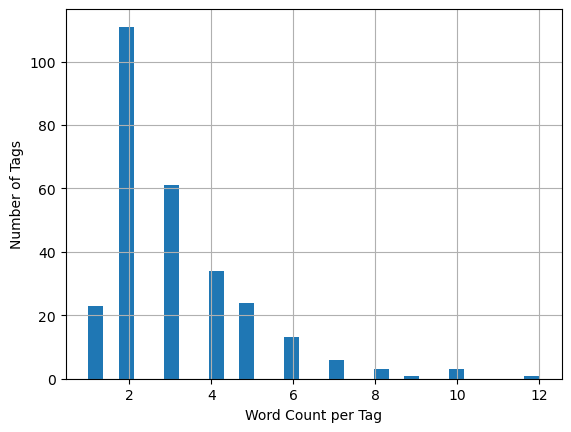

In [25]:
# Product Tags
word_count = vocab["tag"].apply(lambda s: len(s.strip().split()))
ax = word_count.hist(bins=30)
ax.set_xlabel("Word Count per Tag")
ax.set_ylabel("Number of Tags")
ax

In [26]:
vocab.groupby("preference")["tag"].agg([('Number of Tags', 'count')]).reset_index()

,preference,Number of Tags
0,Allergen-free products,31
1,Award winning or high quality certified products,2
2,Fresh products,3
3,Gluten-free products,10
4,High-protein products,11
5,Lactose-free products,5
6,Locally originated and domestic products,5
7,Low fat products,7
8,Low salt products,5
9,Low sugar products,4


In [27]:
vocab.groupby("preference category")["tag"].agg([('Number of Tags', 'count')]).reset_index()

,preference category,Number of Tags
0,Environment,75
1,Health,128
2,Quality,10
3,Social,67


In [28]:
pd.DataFrame(vocab).to_excel("vocab.xlsx")

### Manual Data Augmentation

In [29]:
vocab_updated = pd.read_excel("vocab_updated.xlsx")
vocab_updated.drop(columns=vocab_updated.columns[0], axis=1, inplace=True)
vocab_updated.drop_duplicates(subset=["tag", "preference"], inplace=True)
vocab_updated.head(5)

,tag,preference,association,preference category,conditional,update_code,comment,Len
0,allergen celery product,Allergen-free products,-1,Health,True,2,Removed Unnecessary Words,23
1,allergen crustacean product,Allergen-free products,-1,Health,True,2,Removed Unnecessary Words,27
2,allergen egg,Allergen-free products,-1,Health,True,2,Removed Unnecessary Words,12
3,allergen egg,High-protein products,1,Health,False,2,Removed Unnecessary Words,12
4,allergen egg,Products from companies that support animal ri...,-1,Social,False,2,Removed Unnecessary Words,12


| Update Code | Code Description | Possible Reasons |
|---|---|---|
|0 | No Change | No changes done to the tag |
|1 | New tag added | Alternate tags for existing tags or negation of tags by using keywords like "without", "not" or "no" |
|2 | Updated | Spelling corrections or converting keyword from unigram to bi-gram |
|-1 | Removed | Specific to the experiment conducted in Estonian and Austrian market or non-English words or redundant tags |


In [30]:
vocab_updated["update_code"].value_counts()

 0    219
 1    136
 2     38
-1     26
Name: update_code, dtype: int64

In [31]:
# Filtering out only the tags that are retained with codes 0,1,2
vocab_updated = vocab_updated.loc[vocab_updated["update_code"]>=0]
vocab_updated.drop_duplicates(subset=["tag", "preference"], inplace=True)
vocab_updated.reset_index(drop=True, inplace=True)
vocab_updated.sample(5)

,tag,preference,association,preference category,conditional,update_code,comment,Len
345,vegetarian,Vegetarian products,1,Health,True,0,No Change,10
185,high sugar,Low sugar products,-1,Health,False,0,No Change,10
7,allergen fish and derived product,Allergen-free products,-1,Health,True,2,Removed Unnecessary Words,33
362,without animal product,Vegetarian products,1,Health,True,1,Negation,22
264,organic ingredient,Sustainably farmed products,1,Environment,False,1,Adding new tags (Ala's taxonomy),18


In [32]:
print(f"Vocab Size before Manual Data Augmentation = {vocab.shape[0]}")
print(f"Vocab Size after Manual Data Augmentation = {vocab_updated.shape[0]}")

Vocab Size before Manual Data Augmentation = 280
Vocab Size after Manual Data Augmentation = 393


In [33]:
# Inserting into ontology data table
table_col_map = {"preference":"sustainability_preference", "preference category": "preference_category"}
data_to_insert = vocab_updated[["tag", "preference", "preference category", "association", "conditional"]]
data_to_insert.index.name="idx"
data_to_insert = data_to_insert.rename(columns=table_col_map)
dbWriter.insert_data(df=data_to_insert, table_name="ontology_data", include_index=True)

Successfully inserted (or updated) ontology_data table


In [34]:
vocab_updated.groupby(["preference", "preference category"]).count().reset_index()[["preference", "preference category"]]

,preference,preference category
0,Allergen-free products,Health
1,Award winning or high quality certified products,Quality
2,Fresh products,Quality
3,Gluten-free products,Health
4,High-protein products,Health
5,Lactose-free products,Health
6,Locally originated and domestic products,Quality
7,Low fat products,Health
8,Low salt products,Health
9,Low sugar products,Health


<AxesSubplot:xlabel='Word Count per Tag', ylabel='Number of Tags'>

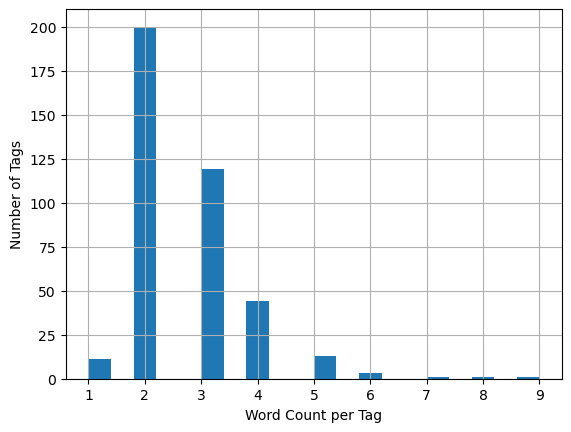

In [35]:
# Product Tags
word_count = vocab_updated["tag"].apply(lambda s: len(s.strip().split()))
ax = word_count.hist(bins=20)
ax.set_xlabel("Word Count per Tag")
ax.set_ylabel("Number of Tags")
ax

## Keyword Extraction

In [36]:
from ProjectModules import KeywordExtractor

In [37]:
with open("custom_stopwords.txt", "r") as f:
    custom_stopwords = f.read().split("\n")
print(f"Number of custom stopwords: {len(custom_stopwords)}")

Number of custom stopwords: 171


#### Checking TF-IDF without Augmented Vocab

In [38]:
print("TF-IDF without Vocab Augmentation")
reload = True
if reload:
    keyword_extractor_wva = KeywordExtractor(stop_words=custom_stopwords)
    desc_tfidf_wva, onto_tfidf_wva = keyword_extractor_wva.extract_keywords(ontology_data=vocab["tag"], 
                                                                        product_data=amazon_data["description"])
    pickle.dump(keyword_extractor_wva, open('keyword_extractor_wva', 'wb'))
else:
    keyword_extractor_wva = pickle.load(open("keyword_extractor_wva", "rb"))
    onto_tfidf_wva, desc_tfidf_wva = keyword_extractor_wva.ontology_tf, keyword_extractor_wva.product_tfidf
print(f"Ontology vocab Size: {onto_tfidf_wva.shape[0]} | Number of features: {onto_tfidf_wva.shape[1]}")
print(f"Number of product descriptions: {desc_tfidf_wva.shape[0]}")
print(f"Product tags identified in {len(np.unique(desc_tfidf_wva.nonzero()[0]))} product descriptions out of {desc_tfidf_wva.shape[0]}")

TF-IDF without Vocab Augmentation
Ontology vocab Size: 280 | Number of features: 691
Number of product descriptions: 202961
Product tags identified in 53886 product descriptions out of 202961


#### Checking TF-IDF with Augmented Vocab

In [39]:
print("TF-IDF with Vocab Augmentation")
reload = True
if reload:
    keyword_extractor = KeywordExtractor(stop_words=custom_stopwords)
    desc_tfidf, onto_tfidf = keyword_extractor.extract_keywords(ontology_data=vocab_updated["tag"], 
                                                                product_data=amazon_data["description"])
    pickle.dump(keyword_extractor, open('keyword_extractor', 'wb'))
else:
    keyword_extractor = pickle.load(open("keyword_extractor", "rb"))
    onto_tfidf, desc_tfidf = keyword_extractor.ontology_tf, keyword_extractor.product_tfidf
    
print(f"Ontology vocab size: {onto_tfidf.shape[0]} | Number of features: {onto_tfidf.shape[1]}")
print(f"Number of product descriptions: {desc_tfidf.shape[0]}")
print(f"Product tags identified in {len(np.unique(desc_tfidf.nonzero()[0]))} product descriptions out of {desc_tfidf.shape[0]}")

TF-IDF with Vocab Augmentation
Ontology vocab size: 393 | Number of features: 632
Number of product descriptions: 202961
Product tags identified in 77810 product descriptions out of 202961


In [40]:
# Inserting the vocabulary created
vocabulary = pd.DataFrame()
vocabulary["vocab"] = keyword_extractor.get_vocab()
dbWriter.insert_data(df=vocabulary, table_name="vocabulary", include_index=True)

Successfully inserted (or updated) vocabulary table


#### Investigating the difference

**Without Manual Augmentation**

In [41]:
wva_ex = np.setdiff1d(np.unique(desc_tfidf_wva.nonzero()[0]), np.unique(desc_tfidf.nonzero()[0]))
va_ex = np.setdiff1d(np.unique(desc_tfidf.nonzero()[0]), np.unique(desc_tfidf_wva.nonzero()[0]))

In [42]:
for i in wva_ex[:2]:
    print(f"Product Index: {i}")
    print(f"Description: {amazon_data.iloc[i]['description']}")
    print(f"Keywords identified: {keyword_extractor_wva.get_vocab()[desc_tfidf_wva[i].indices]}\n")

Product Index: 2
Description: lipton yellow label tea use only the finest tea leaves these leaves are specially cut to expose more of the juices then they are curled into tiny beads to seal in more of the flavor enjoy a hot cup of lipton yellow label tea today tea statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keywords identified: ['use only']

Product Index: 117
Description: egypt provides us with the finest chamomile flowers of which we use only flower heads no extenders this produces a tisane with definite body not thin and watery customers comment that our chamomile has an unusually strong fresh scent that reminds them of green apples chamomile has often been served as a calmative over the years chamomile flowers statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health cond

In [43]:
i = 1292
print(f"Product Index: {i}")
print(f"Description: {amazon_data.iloc[i]['description']}")
print(f"Keywords identified: {keyword_extractor_wva.get_vocab()[desc_tfidf_wva[i].indices]}\n")

Product Index: 1292
Description: chinrose champion stem ginger in syrup is chinese ginger preserved in a sugar and water syrup it has the consistency of a canned peach or pear yet it still maintains the ginger tang it can be eaten on its own or mixed with cream cheese used in sauces an ingredient in cooking the options are endless country of origin china ginger sugar water statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keywords identified: ['country origin']



**With Manual Augmentation**

In [44]:
for i in va_ex[:2]:
    print(f"Product Index: {i}")
    print(f"Description: {amazon_data.iloc[i]['description']}")
    print(f"Keywords identified: {keyword_extractor.get_vocab()[desc_tfidf[i].indices]}\n")

Product Index: 3
Description: lipton yellow label teabags uses a new way to make tea to lock in as much of the tea taste and aroma as possible we developed an innovative new process we press fresh high quality tea leaves to release their natural essence and we have developed a new blend with this essence enjoy a cup of tea with perfect color and taste that reinvigorates you shipping weight keywords search terms black tea bags lipton tea bags statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keywords identified: ['high quality']

Product Index: 25
Description: personality wise and lively a breath of fresh air herbal power gently shakes things up and helps you breathe easy reason to love one of our original formulas breathe easy tea has been supporting people for nearly four decades this enduring classic combines the best of western herbalism with ancient traditional chinese w

In [45]:
i = 3
print(f"Product Index: {i}")
print(f"Description: {amazon_data.iloc[i]['description']}")
print(f"Keywords identified: {keyword_extractor.get_vocab()[desc_tfidf[i].indices]}\n")

Product Index: 3
Description: lipton yellow label teabags uses a new way to make tea to lock in as much of the tea taste and aroma as possible we developed an innovative new process we press fresh high quality tea leaves to release their natural essence and we have developed a new blend with this essence enjoy a cup of tea with perfect color and taste that reinvigorates you shipping weight keywords search terms black tea bags lipton tea bags statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keywords identified: ['high quality']



#### Investigate descriptions and identified keywords

In [46]:
value_counts = np.unique(desc_tfidf.nonzero()[0], return_counts=True)
print("Top few descriptions with most keywords: ")
for i in sorted(zip(*value_counts), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Product Index: {i[0]:<10} Number of keywords: {i[1]:<10}")


Top few descriptions with most keywords: 
Product Index: 5524       Number of keywords: 26        
Product Index: 31891      Number of keywords: 25        
Product Index: 5542       Number of keywords: 24        
Product Index: 18832      Number of keywords: 24        
Product Index: 19096      Number of keywords: 24        
Product Index: 19102      Number of keywords: 24        
Product Index: 5523       Number of keywords: 23        
Product Index: 25287      Number of keywords: 23        
Product Index: 50191      Number of keywords: 23        
Product Index: 32944      Number of keywords: 22        


In [47]:
sample_index = 5524
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description_before'][:2000]}")
print(f"\nKeyword Identified: {keyword_extractor.get_vocab()[desc_tfidf[sample_index].indices]}")

Sample Index: 5524
Product details for the considered sample: 
Title: EnviroKidz Organic Gluten-Free Animal Cookies, Vanilla, 9-Ounce Boxes (Pack of 12)
Description: Whether you're big or little, Nature's Path cookies will satisfy the kid in all of us, kid-pleasing, bite-sized fun. Don&#8217;t let the kids fool you - they're good for adults too! Treat yourself! <div class="aplus" > <img src="https://images-na.ssl-images-amazon.com/images/G/01/grocery/detail-page/naturespath/GlutenFreeInsert.jpg" alt="Certified Gluten Free" align="left"><b>Nature&rsquo;s Path organic Honey&rsquo;d corn flakes cereal</b> contains crisp, golden, gluten-free flakes made of pure cornmeal, lightly sweetened with concentrated grape juice and with a mix of organic evaporated cane juice and honey. Be sure, you will not have to lower your expectations even if you are eating a gluten-free, wheat-free breakfast. You do not have to settle for ordinary flakes or tasteless gluten-free cereal when Nature&rsquo;s Path 

In [48]:
sample_index = 50191      
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"\nKeyword Identified: {keyword_extractor.get_vocab()[desc_tfidf[sample_index].indices]}")

Sample Index: 50191
Product details for the considered sample: 
Title: Nature's Path Crunchy Vanilla Sunrise, Gluten Free, 10.6 Ounces (Pack of 3)
Description: a delicious vanilla breakfast cereal with a variety of crunchy textures from flakes puffs and crispies make this a genuinely tasty gluten free breakfast div class aplus img src https images na ssl images amazon com images g grocery detail page naturespath glutenfreeinsert jpg alt certified gluten free align left nature s path organic sunrise crunchy vanilla cereal b is a delicious warm real vanilla breakfast cereal with a variety of crunchy textures from flakes puffs and crispies a genuinely tasty gluten free breakfast be sure you will not have to lower your expectations even if you are eating a gluten free wheat free breakfast it contains the whole grain goodness of organic flax buckwheat and the ancient grains quinoa and amaranth these were once the staples of aztec and peruvian homes and now you can enjoy their unique tastes 

In [49]:
sample_index = 5919       
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description'][:2000]}")
print(f"\nKeyword Identified: {keyword_extractor.get_vocab()[desc_tfidf[sample_index].indices]}")

Sample Index: 5919
Product details for the considered sample: 
Title: Mrs. May's Dry-Roasted Snack, Sunflower Crunch, 12 - 5-Ounce Pouches
Description: all natural no cholesterol dairy free no additives vegan wheat free no preservatives at mrs may s we re mostly nuts the good kind peanuts almonds pecans cashews walnuts they re slowly dry roasted given a dash of sea salt and brushed with sweetness for a world class crunch we care about what we put in our mouths yours too we use only premium grade wholesome ingredients no artificial colors or flavors and we believe in free as in cholesterol free dairy free wheat free we put plenty of natural goodness in our light and crunchy snacks but mostly we re nuts product of china in a world of processed foods endless ingredient lists and high sugar treats mrs may s naturals took a more basic approach why not combine simple and wholesome ingredients to make a delicious snack sounds easy but it wasn t while mrs may s treats go back more than two gen

In [50]:
sample_index = 26
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"\nKeyword Identified: {keyword_extractor.get_vocab()[desc_tfidf[sample_index].indices]}")

Sample Index: 26
Product details for the considered sample: 
Title: WHOPPERS Candy (Chocolate Covered Malted Milk Candy Balls),7 Ounce Bag (Pack of 12)
Description: whoppers malted milk balls are the classic confections that have delighted chocolate lovers for decades enjoy the classic combination of crunchy malt and smooth milk chocolate whoppers candies are the perfect snack for the office home or on the go you can even use them for edible crafts or baking great for filling candy bowls snacking with your favorite movie or tv show or simply enjoying as an afternoon treat whoppers malted milk balls are ou certified as a kosher food stock up for snacks and special events with this pack of individual ounce bags all major allergens are contained and listed as ingredients on our labels as recommended by food allergy and anaphylaxis network faan please check the label on each package before purchasing sugar corn syrup partially hydrogenated palm kernel oil whey milk malted milk barley malt 

In [51]:
# Insert product keywords identified
keywords = desc_tfidf.tocsr().nonzero()
product_keywords = pd.DataFrame()
product_keywords["product_idx"]=keywords[0]
product_keywords["vocab_idx"]=keywords[1]
product_keywords["source"] = "amazon_data_1"

dbWriter.insert_data(df=product_keywords, table_name="product_keywords", include_index=False)

Successfully inserted (or updated) product_keywords table


## Mapping Keywords

In [52]:
from ProjectModules import KeywordsMapper

### Compute Mapping

In [53]:
keywords_mapper = KeywordsMapper(keyword_extractor=keyword_extractor)
all_mappings = keywords_mapper.map_keywords()
all_mappings

,product_idx,onto_idx,imp_score
0,3,182,0.500000
1,11,28,0.316228
2,18,272,1.000000
3,25,182,0.500000
4,26,272,0.688744
...,...,...,...
290621,202959,8,0.500000
290622,202959,7,0.316228
290623,202959,6,0.316228
290624,202959,1,0.500000


### Aggregate Scores
#### Product to Ontology Mapping

<AxesSubplot:>

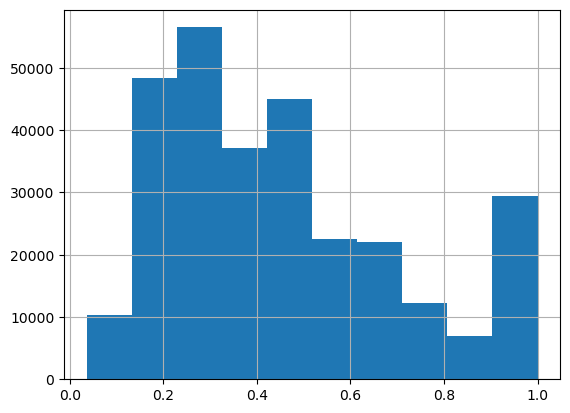

In [54]:
all_mappings["imp_score"].hist()

In [55]:
# Insert the apping into the database
data_to_insert = all_mappings[["product_idx", "onto_idx", "imp_score"]]
data_to_insert["source"] = "amazon_data_1"
dbWriter.insert_data(df=data_to_insert, table_name="product_ontology_mapping", include_index=False)

Successfully inserted (or updated) product_ontology_mapping table


In [56]:
dbWriter.execute_script(query_script="generate_primary_sustainability_info_pivot_query.sql", should_generate_query=True)

Pivot table query generated: DROP VIEW IF EXISTS V_PRIMARY_SUSTAINABILITY_INFORMATION; CREATE VIEW V_PRIMARY_SUSTAINABILITY_INFORMATION AS  SELECT SOURCE, PRODUCT_IDX , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE SUSTAINABILITY_PREFERENCE = "Allergen-free products") AS "ALLERGEN-FREE" , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE SUSTAINABILITY_PREFERENCE = "Vegan products") AS "VEGAN" , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE SUSTAINABILITY_PREFERENCE = "Gluten-free products") AS "GLUTEN-FREE" , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE SUSTAINABILITY_PREFERENCE = "Vegetarian products") AS "VEGETARIAN" , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE SUSTAINABILITY_PREFERENCE = "Lactose-free products") AS "LACTOSE-FREE" FROM (SELECT POM.SOURCE, POM.PRODUCT_IDX, OD.SUSTAINABILITY_PREFERENCE, 
POM.IMP_SCORE*OD.ASSOCIATION AS ASSOCIATION_IMP_SCORE 
FROM PRODUCT_ONTOLOGY_MAPPING POM 
LEFT JOIN ONTOLOGY_DATA OD 
ON POM.ONTO_IDX=OD.IDX WHERE OD.CONDITIONAL=TRUE) GROUP BY SOURCE, PRODUCT_IDX ORDER BY SO

In [57]:
dbWriter.execute_script(query_script="generate_supplementary_sustainability_info_pivot_query.sql", should_generate_query=True)

Pivot table query generated: DROP VIEW IF EXISTS V_SUPPLEMENTARY_SUSTAINABILITY_INFORMATION; CREATE VIEW V_SUPPLEMENTARY_SUSTAINABILITY_INFORMATION AS  SELECT SOURCE, PRODUCT_IDX , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE PREFERENCE_CATEGORY = "Health") AS "health" , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE PREFERENCE_CATEGORY = "Social") AS "social" , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE PREFERENCE_CATEGORY = "Environment") AS "environment" , AVG(ASSOCIATION_IMP_SCORE) FILTER (WHERE PREFERENCE_CATEGORY = "Quality") AS "quality" FROM (SELECT POM.SOURCE, POM.PRODUCT_IDX, OD.PREFERENCE_CATEGORY, 
POM.IMP_SCORE*OD.ASSOCIATION AS ASSOCIATION_IMP_SCORE 
FROM PRODUCT_ONTOLOGY_MAPPING POM 
LEFT JOIN ONTOLOGY_DATA OD 
ON POM.ONTO_IDX=OD.IDX WHERE OD.CONDITIONAL=FALSE) GROUP BY SOURCE, PRODUCT_IDX ORDER BY SOURCE, PRODUCT_IDX;
Script generate_supplementary_sustainability_info_pivot_query.sql executed succesfully!


In [58]:
dbWriter.execute_script(query_script="final_sustainable_product_info_queries.sql");

Script final_sustainable_product_info_queries.sql executed succesfully!


#### Sustainability Mapping

In [59]:
# Final data
sustainable_products = dbWriter.read_table(table_name="V_SUSTAINABILITY_PRODUCT_INFO")
sustainable_products.sample(5)

Successfully loaded data from V_SUSTAINABILITY_PRODUCT_INFO!


,SOURCE,PRODUCT_IDX,PRODUCT_TITLE,PRODUCT_DESCRIPTION,KEYWORDS,HEALTH,SOCIAL,ENVIRONMENT,QUALITY,VEGAN,GLUTEN-FREE,VEGETARIAN,LACTOSE-FREE,ALLERGEN-FREE
66509,amazon_data_1,172837,"Earth Balance Mac and Cheese, Vegan Cheddar Fl...",Craving smooth cheddar flavored goodness? Look...,"gluten free, natural flavor, no gluten",0.3683,NaN,NaN,NaN,NaN,0.6365,NaN,NaN,0.8010
8573,amazon_data_1,17242,"Scharffen Berger, 82% Extra Dark Chocolate Bar...",chocolate Bar Extra dark 82%. Perfect for gift...,non gmo,NaN,NaN,0.5000,NaN,NaN,NaN,NaN,NaN,NaN
40622,amazon_data_1,101308,"Grey Poupon Dijon Mustard, 16 oz Jar","Everyday mustard, lavished with extraordinary ...",mustard seed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3162
49474,amazon_data_1,125849,Russell Stover Sugar Free Peanut Butter Cups (...,Enjoy the delicious flavor combination of pean...,"artificial flavor, natural flavor",-0.0637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63497,amazon_data_1,164535,Sixlets Easter Candies 4 oz,"Sixlets in pastel Easter colors. 'SUGAR, DEXTR...","artificial flavor, natural flavor, palm oil",-0.0462,NaN,-0.6887,NaN,NaN,NaN,NaN,NaN,NaN


### Programmatic way of integrating ontology data and aggregating scores

In [60]:
all_mappings = keywords_mapper.integrate_ontology(vocab_updated[["tag", "preference", "preference category", "association", "conditional"]])
all_mappings.head(5)

,product_idx,onto_idx,imp_score,tag,preference,preference category,association,conditional,association_imp_score
0,3,182,0.500000,high quality and standard,Award winning or high quality certified products,Quality,1,False,0.500000
1,11,28,0.316228,allergen sesame seed product,Allergen-free products,Health,-1,True,-0.316228
2,18,272,1.000000,palm oil,Products produced and distributed in an enviro...,Environment,-1,False,-1.000000
3,25,182,0.500000,high quality and standard,Award winning or high quality certified products,Quality,1,False,0.500000
4,26,272,0.688744,palm oil,Products produced and distributed in an enviro...,Environment,-1,False,-0.688744


In [61]:
final_mapping = keywords_mapper.aggregate_mapping(by="preference category", conditional=False)
final_mapping.columns = ["Environment", "Health", "Quality", "Social"]
final_mapping.head(5)

,Environment,Health,Quality,Social
product_idx,,,,
3,NaN,NaN,0.5,NaN
18,-1.000000,NaN,NaN,NaN
25,NaN,NaN,0.5,NaN
26,-0.688744,-0.046216,NaN,NaN
27,NaN,-0.611809,NaN,-0.791005


In [62]:
# Collecting it all in one frame
final_mapping=final_mapping.merge(amazon_data, how="left", left_index=True, right_index=True)
keywords = product_keywords.merge(vocabulary, left_on="vocab_idx", right_index=True).groupby("product_idx").agg({'vocab':', '.join})
keywords.columns=["keywords"]
final_mapping = final_mapping.merge(keywords, how="left", left_index=True, right_index=True)
final_mapping

,Environment,Health,Quality,Social,category,description,title,brand,price,asin,description_before,keywords
product_idx,,,,,,,,,,,,
3,NaN,NaN,0.5,NaN,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",lipton yellow label teabags uses a new way to ...,Lipton Yellow Label Finest Blend Tea Bags 100 ...,Lipton,$12.98,4639725183,Lipton Yellow Label Teabags uses a new way to ...,high quality
18,-1.000000,NaN,NaN,NaN,"[Grocery & Gourmet Food, Cooking & Baking, Coo...",natures best nigerian palm oil is a popular pa...,Nature&rsquo;s Best Nigerian Palm Oil 1Liter/3...,Nature's-Best,$10.99,8557758987,Natures Best Nigerian Palm Oil is a popular pa...,palm oil
25,NaN,NaN,0.5,NaN,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",personality wise and lively a breath of fresh ...,Traditional Medicinals Organic Breathe Easy Se...,Traditional Medicinals,$28.68,B00005344V,"Personality: Wise and lively, a breath of fres...",quality standard
26,-0.688744,-0.046216,NaN,NaN,"[Grocery & Gourmet Food, Candy & Chocolate, Ca...",whoppers malted milk balls are the classic con...,WHOPPERS Candy (Chocolate Covered Malted Milk ...,Whoppers,,B00005BPQ9,WHOPPERS Malted Milk Balls are the classic con...,"palm oil, artificial flavor, natural flavor"
27,NaN,-0.611809,NaN,-0.791005,"[Grocery & Gourmet Food, Candy & Chocolate, Ca...",snickers chocolate bar milk chocolate peanuts ...,"Snickers Candy Bar, 2.07-Ounce Bars (Pack of 48)",Snickers,$42.50,B00005C1YG,"Snickers Chocolate Bar.<br>Milk Chocolate, Pea...","artificial flavor, contain milk"
...,...,...,...,...,...,...,...,...,...,...,...,...
202953,NaN,0.243706,NaN,NaN,"[Grocery & Gourmet Food, Beverages, Bottled Be...",we get it most meal replacements and protein s...,WakeShake Collagen Protein Meal Replacement Sh...,WakeShake,,B01HJ7QPKU,We get it. Most meal replacements and protein ...,"free gluten, no artificial flavor, free artifi..."
202956,NaN,0.438743,NaN,-0.500000,"[Grocery & Gourmet Food, Condiments & Salad Dr...",a unique blend of herbs just goddess from hamp...,"HAMPTON CREEK Just Goddess Dressing, 12 Fluid ...",Hampton Creek,,B01HJEO4QK,"A unique blend of herbs, Just Goddess from Ham...",allergen product
202957,NaN,0.000000,NaN,NaN,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",caffarel fruit jellies are a product of italy ...,"Caffarel Fruit Jellies, Organic Assorted, 200 ...",Caffarel,,B01HJFBN9A,Caffarel fruit jellies are a product of Italy....,"gluten free, gell agent"


In [63]:
final_mapping.to_csv("aggregated_mappings.csv")

### Data Quality Checks

#### Uniqueness

In [64]:
# Checking for duplicates by decription
duplicates = sustainable_products.groupby(by=["PRODUCT_DESCRIPTION"]).agg({'PRODUCT_IDX':[('idxs',lambda x: list(x)), ('count','count')]}).reset_index()
duplicates.columns=["product_description", 'idxs', 'count']
duplicates[(duplicates['count']>1)] # None found

,product_description,idxs,count


In [65]:
#Duplicates by product title
duplicates = sustainable_products.groupby(by=["PRODUCT_TITLE"]).agg({'PRODUCT_DESCRIPTION':'||||'.join , 'PRODUCT_IDX':[('idxs',lambda x: list(x)), ('count','count')]}).reset_index()
duplicates.columns=["product_title", "product_description", 'idxs', 'count']
duplicates[(duplicates['count']>1)]

,product_title,product_description,idxs,count
667,"Grocery &amp; Gourmet Food"" />",Venison that is Wisconsin farm raised. Comes i...,"[22049, 22715, 22779, 23126, 23160, 23403, 236...",197
2025,100% Natural Raw Domestic Wild Flower Honey - ...,Top quality domestic honey from the pure Amish...,"[71954, 71970]",2
4531,Amora Dijon Mustard,You won't find a French kitchen without a jar ...,"[51249, 152126]",2
5227,Annie's Gluten Free Lite Raspberry Vinaigrette...,"Annies Homegrown Lite Raspberry Vinaigrette, 8...","[3087, 15891]",2
5229,Annie's Gluten Free Microwaveable Mac &amp; Ch...,Mucinex children's liquid cough medicine helps...,"[74227, 162234]",2
...,...,...,...,...
76362,"Yogi Tea Green Tea Blueberry Slim Life, Herbal...",Green Tea Blueberry Slim Life is specifically ...,"[139314, 185444]",2
76397,Yogi Teas Tea Kava Stress Relief,"When stress has a hold on you, find the closes...","[70302, 73784]",2
76531,"Yost Kiddi Pops, 100 Count Carton (4.5 lbs) - ...",Each carton contains 100 assorted flavor Kiddi...,"[70028, 73781]",2
76597,"YumEarth Organic Fruit Snacks, 50 snack packs",YumEarth Organic Fruit Snacks are packed with ...,"[97895, 177215]",2


#### Consistency check

In [66]:
# Consistency check
sustainable_products[sustainable_products["PRODUCT_IDX"].isin([71954, 71970] )][['PRODUCT_TITLE','PRODUCT_DESCRIPTION',
       'KEYWORDS', 'HEALTH', 'SOCIAL', 'ENVIRONMENT', 'QUALITY']]

,PRODUCT_TITLE,PRODUCT_DESCRIPTION,KEYWORDS,HEALTH,SOCIAL,ENVIRONMENT,QUALITY
30660,100% Natural Raw Domestic Wild Flower Honey - ...,Top quality domestic honey from the pure Amish...,"no additive, no pesticide, no preservative, pe...",0.0243,0.121,0.3006,NaN
30665,100% Natural Raw Domestic Wild Flower Honey - ...,Top quality domestic honey from the pure Amish...,"no additive, no pesticide, no preservative, pe...",0.0243,0.121,0.3006,NaN


#### Accuracy

In [67]:
# Looking for factual correctness and true positives.
temp = final_mapping.loc[final_mapping[['Environment', 'Health', 'Quality', 'Social']].count(axis=1)>2]
word_len = temp["description"].apply(lambda x: len([i for i in x.split() if len(i)>1]))
keywords_size = temp["keywords"].apply(lambda x: len([i for i in x.split(",") if len(i)>1]))
temp[(word_len<=50) & (keywords_size>3)].sort_values(by="description", ascending=False)

,Environment,Health,Quality,Social,category,description,title,brand,price,asin,description_before,keywords
product_idx,,,,,,,,,,,,
174597,0.446465,0.494576,NaN,0.494576,"[Grocery & Gourmet Food, Cooking & Baking, Nut...",whole terra organic shelled sunflower seeds ce...,Whole Terra Organic Shelled Sunflower Seeds (4...,Whole Terra,,B00ZQ3JCDW,"Whole Terra Organic Shelled Sunflower Seeds, 1...","gluten free, certified organic, non gmo, gmo free"
19074,0.368872,0.368872,0.616082,0.368872,"[Grocery & Gourmet Food, Canned, Jarred & Pack...",usda organic easy to serve certified organic b...,"Grown Right Organic Jellied Cranberry Sauce, 1...",Grown Right,,B000WD3T9E,USDA organic. Easy to serve. Certified organic...,"certified organic, certified quality, organic ..."
10474,0.279747,0.262268,NaN,0.220565,"[Grocery & Gourmet Food, Produce, Fresh Fruits]",usda organic certified organic by natural food...,"Klein's Naturals Pineapple, Organic, (Pack of 6)",Unknown,,B000IEFWAG,USDA organic. Certified organic by Natural Foo...,"peanut product, product organic, certified org..."
10496,0.279747,0.262268,NaN,0.220565,"[Grocery & Gourmet Food, Produce, Dried Fruits...",usda organic certified organic by natural food...,"Klein's Naturals Cranberries, Organic, 10-Ounc...",Unknown,,B000IEHRLS,USDA organic. Certified organic by Natural Foo...,"peanut product, product organic, certified org..."
10467,0.279747,0.262268,NaN,0.220565,"[Grocery & Gourmet Food, Produce, Dried Fruits...",usda organic certified organic by natural food...,"Klein's Naturals Apricots, Organic, (Pack of 6)",Unknown,,B000IEDUHS,USDA organic. Certified organic by Natural Foo...,"peanut product, product organic, certified org..."
178137,0.236857,0.216789,NaN,0.242044,"[Grocery & Gourmet Food, Candy & Chocolate, Ha...",usda certified organic all natural ingredients...,Torie &amp; Howard Organic Gluten Free Chewie ...,Torie & Howard,$13.95,B0134OANNM,USDA certified organic. All natural ingredient...,"artificial flavor, organic ingredient, certifi..."
101002,-0.480068,0.032520,NaN,-0.501760,"[Grocery & Gourmet Food, Candy & Chocolate, Je...",tootsie roll midgees oz sugar corn syrup palm ...,Tootsie Roll Midgees 12 oz,Tootsie Roll,$9.99,B00CI29XDI,"Tootsie Roll Midgees 12 oz Sugar, Corn Syrup, ...","palm oil, artificial flavor, natural flavor, c..."
195184,0.326778,0.269935,NaN,0.264285,"[Grocery & Gourmet Food, Candy & Chocolate, Ch...",stevita steviadent sugar free gum natural frui...,Stevita SteviaDent Sugar-Free Gum - Natural Fr...,STEVITA,$17.22,B01D3JHA0C,Stevita SteviaDent Sugar-Free Gum - Natural Fr...,"natural flavor, gluten free, usda organic, non..."
13059,0.238199,0.333851,NaN,0.164458,"[Grocery & Gourmet Food, Snack Foods, Crackers...",savory torta ingredients wheat flour virgin ol...,Traditional spanish crisp bread. Torta de Acei...,Casa Oliver,,B000LUP6GM,"Savory Torta. Ingredients: wheat flour, virgin...","sesame seed, no preservative, no additive, no ..."


In [68]:
sample_index = 101002
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description_before']}")
print(f"Keyword Identified: {keyword_extractor.get_vocab()[desc_tfidf[sample_index].indices]}")
print(final_mapping[final_mapping.index==sample_index][['Environment' ,  'Health' , 'Quality'  , 'Social']])
vocab_updated.iloc[keywords_mapper.importance.getrow(sample_index).indices][["tag", "preference", "association"]]#.to_csv("examples.csv")

Sample Index: 101002
Product details for the considered sample: 
Title: Tootsie Roll Midgees 12 oz
Description: Tootsie Roll Midgees 12 oz Sugar, Corn Syrup, Palm Oil, Condensed Skim Milk, Cocoa, Whey, Soy Lecithin, Artificial and Natural Flavors. Contains Milk, Contains Soy. Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.
Keyword Identified: ['artificial flavor' 'contain milk' 'contain soy' 'natural flavor'
 'palm oil']
             Environment   Health  Quality   Social
product_idx                                        
101002         -0.480068  0.03252      NaN -0.50176


,tag,preference,association
idx,,,
272,palm oil,Products produced and distributed in an enviro...,-1
209,natural flavor,Products without artificial colours or flavor ...,1
95,contains soy bean product,High-protein products,1
94,contains soy bean product,Allergen-free products,-1
84,contain milk,Vegan products,-1
83,contain milk,Products from companies that support animal ri...,-1
82,contain milk,Lactose-free products,-1
81,contain milk,Allergen-free products,-1
36,artificial flavor,Products without artificial colours or flavor ...,-1


In [69]:
temp[(word_len<=50) & (keywords_size>3) & (temp["keywords"].str.contains("chemical"))]

,Environment,Health,Quality,Social,category,description,title,brand,price,asin,description_before,keywords
product_idx,,,,,,,,,,,,
13059,0.238199,0.333851,NaN,0.164458,"[Grocery & Gourmet Food, Snack Foods, Crackers...",savory torta ingredients wheat flour virgin ol...,Traditional spanish crisp bread. Torta de Acei...,Casa Oliver,,B000LUP6GM,"Savory Torta. Ingredients: wheat flour, virgin...","sesame seed, no preservative, no additive, no ..."
13064,0.227063,0.031527,NaN,0.156770,"[Grocery & Gourmet Food, Candy & Chocolate, Ca...",gourmet dark chocolate lb gr bar ingredients c...,Gourmet dark chocolate bar Blanxart..,Casa Oliver,,B000LUP662,Gourmet dark chocolate 0.4lb/200gr. bar. Ingre...,"no preservative, with preservative, no additiv..."


In [70]:
# False positive
sample_index = 56594 #78
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"Keyword Identified: {keyword_extractor.get_vocab()[desc_tfidf[sample_index].indices]}")
print(final_mapping[final_mapping.index==sample_index][['Environment' ,  'Health' , 'Quality'  , 'Social']])
vocab_updated.iloc[keywords_mapper.importance.getrow(sample_index).indices][["tag", "preference", "association"]]

Sample Index: 56594
Product details for the considered sample: 
Title: Annie's Curly Fettuccine with White Cheddar &amp; Broccoli Sauce Pasta 7.25 oz Box
Description: made with goodness no artificial flavors synthetic colors or preservatives cheese from cows not treated with the growth hormone rbst organic wheat curly fettuccine pasta whey cheddar cheese cultured pasteurized milk salt enzymes buttermilk blue cheese cultured pasteurized milk salt enzymes salt non gmo corn starch butter broccoli natural flavor cultured whey onion spice and natural sodium phosphate made on shared equipment that also processes egg and soy contains milk and wheat statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keyword Identified: ['artificial color' 'contain milk' 'natural flavor' 'no artificial flavor'
 'no synthetic' 'non gmo']
             Environment    Health  Quality    Social
product_idx

,tag,preference,association
idx,,,
348,verified non gmo,Sustainably farmed products,1
253,no synthetic pesticide,Sustainably farmed products,1
218,no artificial flavor,Products without artificial colours or flavor ...,1
209,natural flavor,Products without artificial colours or flavor ...,1
84,contain milk,Vegan products,-1
83,contain milk,Products from companies that support animal ri...,-1
82,contain milk,Lactose-free products,-1
81,contain milk,Allergen-free products,-1
35,artificial color,Products without artificial colours or flavor ...,-1


In [71]:
# Looking for cases where keywords were not identified - False Negatives
temp[(word_len<=100) & (keywords_size>2) & (temp["description"].str.contains("organic")) & ~(temp["keywords"].str.contains("organic"))]

,Environment,Health,Quality,Social,category,description,title,brand,price,asin,description_before,keywords
product_idx,,,,,,,,,,,,
22004,0.325101,0.157493,NaN,0.073289,"[Grocery & Gourmet Food, Candy & Chocolate, Je...",sold individually this product is designed and...,St Claire'S Ctr Dsp Licorice Swt Og2 1.5 Oz,St. Claires,$20.56,B0013ALBUY,Sold Individually -This Product Is Designed An...,"gluten free, free gluten, no artificial color,..."
46793,-0.391701,0.592517,NaN,0.703914,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",organic no palm oil nuts no added salt no adde...,Meridian Organic Smooth Peanut Butter No Added...,Meridian,$5.23,B003VJVXH6,Organic. No palm oil!. 100% nuts!. No added sa...,"palm oil, no salt, suitable vegan"
50476,-0.495194,0.690347,0.263725,NaN,"[Grocery & Gourmet Food, Snack Foods, Cookies]",gourmet vegan meat alternative delicious alter...,"Viana Veggie Kebab Style Turkish Roast, 7.05 O...",Viana,,B00483KEF6,Gourmet vegan meat alternative. Delicious alte...,"high quality, palm oil, high protein"
51403,0.446256,0.338179,NaN,0.369544,"[Grocery & Gourmet Food, Snack Foods, Cookies,...",aunt gussies spelt almond biscotti ounce per c...,"Aunt Gussies Spelt Almond Biscotti, 8 Ounce - ...",Aunt Gussie's,$45.35,B004AHEC8A,"Aunt Gussies Spelt Almond Biscotti, 8 Ounce --...","natural flavor, gmo free, egg free"
56594,0.210760,0.027586,NaN,-0.303269,"[Grocery & Gourmet Food, Canned, Jarred & Pack...",made with goodness no artificial flavors synth...,Annie's Curly Fettuccine with White Cheddar &a...,Annie's Homegrown,,B004T38U5Q,"Made with Goodness! No artificial flavors, syn...","natural flavor, contain milk, artificial color..."
61567,-0.562207,0.379041,NaN,0.367509,"[Grocery & Gourmet Food, Snack Foods, Bars]",organic toasted whole oats organic whole oats ...,Annie`s Homegrown Chocolate Chipper Bars 6.9 o...,Annie's Homegrown,,B005763HYS,Organic Toasted Whole Oats (Organic Whole Oats...,"palm oil, natural flavor, fair trade"
68888,0.130286,0.431868,NaN,0.241064,"[Grocery & Gourmet Food, Food & Beverage Gifts]",bill s best uses only the highest quality ingr...,"Bill's Best Chik'nish Vegetarian Seasoning, 11...",Bill's Best,,B0060J8R6Y,Bill's Best uses only the highest quality ingr...,"non gmo, no animal product, low salt"
75247,0.265211,0.233293,NaN,-0.368868,"[Grocery & Gourmet Food, Cooking & Baking, Ext...",flavorganics organic orange extract adds a del...,Flavorganics Orange Extract ( 1x2 OZ),Flavorganics,$4.88,B0078TXO6I,Flavorganics organic orange extract adds a del...,"contain product, gluten free, non gmo"
76130,0.545533,0.371742,NaN,-0.312990,"[Grocery & Gourmet Food, Sauces, Gravies & Mar...",delmonico s sauce steak classic this product c...,"Delmonicos Classic 1837 Steak Sauce, 11-Ounce ...",Delmonicos,$26.89,B007DAPZ28,Delmonico's Sauce Steak Classic 1837. This pro...,"contain product, natural product, mustard seed"


In [72]:
sample_index = 173061
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description_before']}")
print(f"Keyword Identified: {keyword_extractor.get_vocab()[desc_tfidf[sample_index].indices]}")
print(final_mapping[final_mapping.index==sample_index][['Environment' ,  'Health' , 'Quality'  , 'Social']])
vocab_updated.iloc[keywords_mapper.importance.getrow(sample_index).indices][["tag", "preference", "association"]]

Sample Index: 173061
Product details for the considered sample: 
Title: Just Organik Lemon Green Tea, 25 Tea Bags, 100% Organic, GMO Free, Chemical Free, Pesticide Free, USDA Certified
Description: Being Organic, our Lemon Green Tea is free from any chemical or pesticide  We have combined Green tea's antioxidant properties with lemon's freshness to provide is a perfect recipe to keep up against the workplace stress. ALLERGEN DISCLAIMER: This product has been processed/packed in a facility that also deals in Wheat, Soy and Nuts and their products Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.
Keyword Identified: ['allergen product' 'chemical pesticide' 'free from' 'nut product'
 'soy product']
             Environment   Health  Quality    Social
product_idx                                         
173061         -0.482312  0.22642      NaN -0.241951


,tag,preference,association
idx,,,
146,free from lactose,Lactose-free products,1
145,free from lactose,Allergen-free products,1
95,contains soy bean product,High-protein products,1
94,contains soy bean product,Allergen-free products,-1
51,chemical pesticide,Sustainably farmed products,-1
30,allergen soy bean product,High-protein products,1
29,allergen soy bean product,Allergen-free products,-1
28,allergen sesame seed product,Allergen-free products,-1
27,allergen sesame product,Allergen-free products,-1


In [73]:
sample_index = 18
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"Keyword Identified: {keyword_extractor.get_vocab()[desc_tfidf[sample_index].indices]}")
print(final_mapping[final_mapping.index==sample_index][['Environment' ,  'Health' , 'Quality'  , 'Social']])
vocab_updated.iloc[keywords_mapper.importance.getrow(sample_index).indices][["tag", "preference", "association"]]

Sample Index: 18
Product details for the considered sample: 
Title: Nature&rsquo;s Best Nigerian Palm Oil 1Liter/33.814 fl. Oz
Description: natures best nigerian palm oil is a popular palm oil brand palm oil is a common cooking ingredient in the tropical belt of africa southeast asia and parts of brazil statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keyword Identified: ['palm oil']
             Environment  Health  Quality  Social
product_idx                                      
18                  -1.0     NaN      NaN     NaN


,tag,preference,association
idx,,,
272,palm oil,Products produced and distributed in an enviro...,-1


In [74]:
supplementary_info = keywords_mapper.aggregate_mapping(by="preference", conditional=True)
supplementary_info.head(5)

association_imp_score                                             \
preference  Allergen-free products Gluten-free products Lactose-free products   
product_idx                                                                     
11                       -0.316228                  NaN                   NaN   
27                       -0.791005                  NaN             -0.791005   
33                       -0.581755                  NaN             -0.581755   
37                       -0.208447                  NaN             -0.316163   
43                       -0.260312                  NaN                   NaN   

                                                
preference  Vegan products Vegetarian products  
product_idx                                     
11                     NaN                 NaN  
27               -0.791005                 NaN  
33               -0.581755                 NaN  
37               -0.316163                 NaN  
43               -0.411590            -0.41159

In [75]:
supplementary_info.sample(5)

association_imp_score                                             \
preference  Allergen-free products Gluten-free products Lactose-free products   
product_idx                                                                     
108005                    0.393420             0.328041              0.383049   
131248                   -0.590898                  NaN             -0.590898   
187914                         NaN             1.000000                   NaN   
143206                         NaN             1.000000                   NaN   
173024                         NaN             1.000000                   NaN   

                                                
preference  Vegan products Vegetarian products  
product_idx                                     
108005                 NaN                 NaN  
131248           -0.590898                 NaN  
187914                 NaN                 NaN  
143206                 NaN                 NaN  
173024                 NaN                 NaN

In [76]:
supplementary_info.loc[101002]

                       preference            
association_imp_score  Allergen-free products   -0.331874
                       Gluten-free products           NaN
                       Lactose-free products    -0.501760
                       Vegan products           -0.501760
                       Vegetarian products            NaN
Name: 101002, dtype: float64

### Save the models for future use

In [77]:
import pickle

In [78]:
pickle.dump(keyword_extractor, open('keyword_extractor', 'wb'))

In [79]:
pickle.dump(keywords_mapper, open('keyword_mapper', 'wb'))